In [63]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import metrics
import matplotlib.pyplot as plt
# import tensorflow

In [64]:
data = pd.read_csv('D:\\Clinics_5\\refinedIPLDataset.csv')

In [65]:
data

,iteam1,iteam2,batting_first,iresult,margin,ground,neutral_venue,y
0,14,2,0,0,140,3,0,0
1,4,3,0,0,33,7,0,0
2,5,6,0,1,9,1,0,1
3,1,14,1,1,5,2,0,0
4,2,8,0,1,5,36,0,1
...,...,...,...,...,...,...,...,...
811,14,1,1,2,0,8,0,1
812,1,10,1,0,57,8,0,1
813,14,7,1,1,6,9,0,0
814,10,7,1,0,17,9,0,1


In [66]:
data.max(axis=0)

iteam1            14
iteam2            14
batting_first      1
iresult            2
margin           146
ground            36
neutral_venue      1
y                  1
dtype: int64

In [67]:
def absolute_maximum_scale(series):
    return series / series.abs().max()
for col in data.columns:
    data[col] = absolute_maximum_scale(data[col])
data

,iteam1,iteam2,batting_first,iresult,margin,ground,neutral_venue,y
0,1.000000,0.142857,0.0,0.0,0.958904,0.083333,0.0,0.0
1,0.285714,0.214286,0.0,0.0,0.226027,0.194444,0.0,0.0
2,0.357143,0.428571,0.0,0.5,0.061644,0.027778,0.0,1.0
3,0.071429,1.000000,1.0,0.5,0.034247,0.055556,0.0,0.0
4,0.142857,0.571429,0.0,0.5,0.034247,1.000000,0.0,1.0
...,...,...,...,...,...,...,...,...
811,1.000000,0.071429,1.0,1.0,0.000000,0.222222,0.0,1.0
812,0.071429,0.714286,1.0,0.0,0.390411,0.222222,0.0,1.0
813,1.000000,0.500000,1.0,0.5,0.041096,0.250000,0.0,0.0
814,0.714286,0.500000,1.0,0.0,0.116438,0.250000,0.0,1.0


In [68]:
data.max(axis=0)

iteam1           1.0
iteam2           1.0
batting_first    1.0
iresult          1.0
margin           1.0
ground           1.0
neutral_venue    1.0
y                1.0
dtype: float64

In [69]:
data = np.array(data)
np.random.shuffle(data)
data

array([[0.07142857, 0.21428571, 1.        , ..., 0.05555556, 0.        ,
        1.        ],
       [0.71428571, 0.5       , 1.        , ..., 0.02777778, 0.        ,
        0.        ],
       [0.35714286, 1.        , 0.        , ..., 0.02777778, 0.        ,
        0.        ],
       ...,
       [0.28571429, 0.21428571, 0.        , ..., 0.19444444, 0.        ,
        0.        ],
       [1.        , 0.21428571, 0.        , ..., 0.66666667, 1.        ,
        1.        ],
       [0.85714286, 0.07142857, 1.        , ..., 0.30555556, 0.        ,
        0.        ]])

In [70]:
data = pd.DataFrame(data)
data

,0,1,2,3,4,5,6,7
0,0.071429,0.214286,1.0,0.0,0.054795,0.055556,0.0,1.0
1,0.714286,0.500000,1.0,0.5,0.034247,0.027778,0.0,0.0
2,0.357143,1.000000,0.0,0.0,0.027397,0.027778,0.0,0.0
3,0.500000,0.142857,1.0,0.0,0.328767,0.111111,0.0,1.0
4,1.000000,0.071429,0.0,0.0,0.041096,0.416667,0.0,0.0
...,...,...,...,...,...,...,...,...
811,0.285714,0.142857,1.0,0.5,0.047945,0.277778,0.0,0.0
812,0.285714,0.357143,1.0,0.5,0.034247,0.194444,0.0,0.0
813,0.285714,0.214286,0.0,0.0,0.226027,0.194444,0.0,0.0
814,1.000000,0.214286,0.0,0.5,0.041096,0.666667,1.0,1.0


In [71]:
train_y = data[7]

In [72]:
data = data.drop(7, axis=1)
data

,0,1,2,3,4,5,6
0,0.071429,0.214286,1.0,0.0,0.054795,0.055556,0.0
1,0.714286,0.500000,1.0,0.5,0.034247,0.027778,0.0
2,0.357143,1.000000,0.0,0.0,0.027397,0.027778,0.0
3,0.500000,0.142857,1.0,0.0,0.328767,0.111111,0.0
4,1.000000,0.071429,0.0,0.0,0.041096,0.416667,0.0
...,...,...,...,...,...,...,...
811,0.285714,0.142857,1.0,0.5,0.047945,0.277778,0.0
812,0.285714,0.357143,1.0,0.5,0.034247,0.194444,0.0
813,0.285714,0.214286,0.0,0.0,0.226027,0.194444,0.0
814,1.000000,0.214286,0.0,0.5,0.041096,0.666667,1.0


In [73]:
train_x = data
train_x

,0,1,2,3,4,5,6
0,0.071429,0.214286,1.0,0.0,0.054795,0.055556,0.0
1,0.714286,0.500000,1.0,0.5,0.034247,0.027778,0.0
2,0.357143,1.000000,0.0,0.0,0.027397,0.027778,0.0
3,0.500000,0.142857,1.0,0.0,0.328767,0.111111,0.0
4,1.000000,0.071429,0.0,0.0,0.041096,0.416667,0.0
...,...,...,...,...,...,...,...
811,0.285714,0.142857,1.0,0.5,0.047945,0.277778,0.0
812,0.285714,0.357143,1.0,0.5,0.034247,0.194444,0.0
813,0.285714,0.214286,0.0,0.0,0.226027,0.194444,0.0
814,1.000000,0.214286,0.0,0.5,0.041096,0.666667,1.0


In [74]:
x, y = np.array(train_x), np.array(train_y)
x

array([[0.07142857, 0.21428571, 1.        , ..., 0.05479452, 0.05555556,
        0.        ],
       [0.71428571, 0.5       , 1.        , ..., 0.03424658, 0.02777778,
        0.        ],
       [0.35714286, 1.        , 0.        , ..., 0.02739726, 0.02777778,
        0.        ],
       ...,
       [0.28571429, 0.21428571, 0.        , ..., 0.2260274 , 0.19444444,
        0.        ],
       [1.        , 0.21428571, 0.        , ..., 0.04109589, 0.66666667,
        1.        ],
       [0.85714286, 0.07142857, 1.        , ..., 0.05479452, 0.30555556,
        0.        ]])

In [75]:
train_x, test_x, train_y, test_y = x[0:652], x[652::], y[0:652], y[652::]
print(len(train_x), len(test_x), len(train_y), len(test_y))

652 164 652 164


In [76]:
def sigmoid(z):
#     print('7777')
#     s = 1/(1+np.exp(-z))
    s = 1/(1+np.exp(-z))
    return s

In [77]:

def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    #(≈ 3 lines of code)
    # n_x = ... 
    # n_h = ...
    # n_y = ... 
    # YOUR CODE STARTS HERE
    n_x = X.shape[0]
    n_h = 4
    n_y = Y.shape[0]
    # YOUR CODE ENDS HERE
    return (n_x, n_h, n_y)

In [78]:

def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """    
    #(≈ 4 lines of code)
    # W1 = ...
    # b1 = ...
    # W2 = ...
    # b2 = ...
    # YOUR CODE STARTS HERE
    W1 = np.random.randn(n_h,n_x) * 0.1
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h) * 0.1
    b2 = np.zeros((n_y,1))
#     print(W1, W2)
    # YOUR CODE ENDS HERE

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [79]:
# GRADED FUNCTION:forward_propagation

def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    # Retrieve each parameter from the dictionary "parameters"
    #(≈ 4 lines of code)
    # W1 = ...
    # b1 = ...
    # W2 = ...
    # b2 = ...
    # YOUR CODE STARTS HERE
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    # YOUR CODE ENDS HERE
    
    # Implement Forward Propagation to calculate A2 (probabilities)
    # (≈ 4 lines of code)
    # Z1 = ...
    # A1 = ...
    # Z2 = ...
    # A2 = ...
    # YOUR CODE STARTS HERE
#     print(W1.shape, X.shape, b1.shape)
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
#     print(A2)
    # YOUR CODE ENDS HERE
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [80]:
# GRADED FUNCTION: compute_cost

def compute_cost(A2, Y):
    """
    Computes the cross-entropy cost given in equation (13)
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost given equation (13)
    
    """
    
    m = Y.shape[1] # number of examples

    # Compute the cross-entropy cost
    # (≈ 2 lines of code)
    # logprobs = ...
    # cost = ...
    # YOUR CODE STARTS HERE
    logprobs = (np.log(A2)*Y) + (np.log(1-A2)*1-Y)
#     print(logprobs)
    cost = - (np.sum(logprobs))/m 
#     print(cost)
    # YOUR CODE ENDS HERE
    
    cost = float(np.squeeze(cost))  # makes sure cost is the dimension we expect. 
                                    # E.g., turns [[17]] into 17 
#     print(cost)
    
    return cost

In [81]:
# GRADED FUNCTION: backward_propagation

def backward_propagation(parameters, cache, X, Y):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]
    
    # First, retrieve W1 and W2 from the dictionary "parameters".
    #(≈ 2 lines of code)
    # W1 = ...
    # W2 = ...
    # YOUR CODE STARTS HERE
    W1 = parameters['W1']
    W2 = parameters['W2']
    # YOUR CODE ENDS HERE
        
    # Retrieve also A1 and A2 from dictionary "cache".
    #(≈ 2 lines of code)
    # A1 = ...
    # A2 = ...
    # YOUR CODE STARTS HERE
    A1 = cache['A1']
    A2 = cache['A2']
    # YOUR CODE ENDS HERE
    
    # Backward propagation: calculate dW1, db1, dW2, db2. 
    #(≈ 6 lines of code, corresponding to 6 equations on slide above)
    # dZ2 = ...
    # dW2 = ...
    # db2 = ...
    # dZ1 = ...
    # dW1 = ...
    # db1 = ...
    # YOUR CODE STARTS HERE
    dZ2 = A2 - Y
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, keepdims = True, axis = 1)
    dZ1 = np.dot(W2.T , dZ2) * (1 - np.power(A1, 2))
    dW1 = (1/m) * np.dot(dZ1, X.T)
    db1 = (1/m) * np.sum(dZ1, keepdims = True, axis = 1)
    # YOUR CODE ENDS HERE
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [82]:
# GRADED FUNCTION: update_parameters

def update_parameters(parameters, grads, learning_rate = 0.000175):
    """
    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    # Retrieve a copy of each parameter from the dictionary "parameters". Use copy.deepcopy(...) for W1 and W2
    #(≈ 4 lines of code)
    # W1 = ...
    # b1 = ...
    # W2 = ...
    # b2 = ...
    # YOUR CODE STARTS HERE
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    # YOUR CODE ENDS HERE
    
    # Retrieve each gradient from the dictionary "grads"
    #(≈ 4 lines of code)
    # dW1 = ...
    # db1 = ...
    # dW2 = ...
    # db2 = ...
    # YOUR CODE STARTS HERE
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    # YOUR CODE ENDS HERE
    
    # Update rule for each parameter
    #(≈ 4 lines of code)
    # W1 = ...
    # b1 = ...
    # W2 = ...
    # b2 = ...
    # YOUR CODE STARTS HERE
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    # YOUR CODE ENDS HERE
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [83]:
# GRADED FUNCTION: nn_model

def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    print(n_x, n_y)
    
    # Initialize parameters
    #(≈ 1 line of code)
    # parameters = ...
    # YOUR CODE STARTS HERE
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    # YOUR CODE ENDS HERE
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):
         
        #(≈ 4 lines of code)
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        # A2, cache = ...
        
        # Cost function. Inputs: "A2, Y". Outputs: "cost".
        # cost = ...
 
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        # grads = ...
 
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        # parameters = ...
        
        # YOUR CODE STARTS HERE
        A2, cache = forward_propagation(X, parameters)
        cost = compute_cost(A2, Y)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads)
        
        # YOUR CODE ENDS HERE
        
        # Print the cost every 1000 iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

In [84]:
# GRADED FUNCTION: predict

def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    #(≈ 2 lines of code)
    # A2, cache = ...
    # predictions = ...
    # YOUR CODE STARTS HERE
    A2, cache = forward_propagation(X, parameters)
    print(A2)
    predictions = (A2 > 0.5)
    # YOUR CODE ENDS HERE
    
    return predictions

In [85]:
train_x = train_x.reshape((7, 652))
print(test_x.shape)
test_x = test_x.reshape((7, 164))
train_y = train_y.reshape([1,652])
test_y = test_y.reshape([1, 164])
test_y.shape

(164, 7)


(1, 164)

In [86]:
parameters = nn_model(train_x, train_y, n_h = 4, num_iterations = 1000, print_cost=True)

7 1
Cost after iteration 0: 1.597757
Cost after iteration 100: 1.597923
Cost after iteration 200: 1.598087
Cost after iteration 300: 1.598251
Cost after iteration 400: 1.598415
Cost after iteration 500: 1.598578
Cost after iteration 600: 1.598740
Cost after iteration 700: 1.598902
Cost after iteration 800: 1.599063
Cost after iteration 900: 1.599223


In [87]:
predictions = predict(parameters, train_x)
print ('Accuracy: %d' % float((np.dot(train_y, predictions.T) + np.dot(1 - train_y, 1 - predictions.T)) / float(train_y.size) * 100) + '%')

[[0.50199    0.50565707 0.49649369 0.50184317 0.5017127  0.49915473
  0.49840679 0.49995348 0.50468106 0.4964745  0.49637051 0.50029905
  0.49926272 0.5036962  0.50423171 0.50115531 0.50477923 0.50204815
  0.50051667 0.50642887 0.50155369 0.49779142 0.49837841 0.49826632
  0.49891489 0.50120994 0.49698683 0.49673694 0.49615767 0.50412687
  0.50011184 0.50177945 0.49928185 0.49825175 0.50135293 0.50489387
  0.49976404 0.50195679 0.5028349  0.4984765  0.49803525 0.49881705
  0.49756874 0.50367599 0.49863897 0.49817316 0.50620397 0.50341312
  0.50163314 0.50166887 0.50611399 0.49910352 0.50030146 0.5010665
  0.5015919  0.49808328 0.50440649 0.49928571 0.49969168 0.50199564
  0.49921837 0.49731828 0.49330168 0.49818221 0.50520076 0.4917351
  0.49695137 0.49978406 0.49915138 0.50198931 0.49982585 0.50278464
  0.49656572 0.49861039 0.50094051 0.49924507 0.49890176 0.50068027
  0.50378915 0.49815237 0.4982247  0.4968914  0.50185205 0.50152697
  0.49961134 0.50263696 0.49849774 0.5006156  0.50

In [88]:
predictions = predict(parameters, test_x)
print ('Accuracy: %d' % float((np.dot(test_y, predictions.T) + np.dot(1 - test_y, 1 - predictions.T)) / float(test_y.size) * 100) + '%')

[[0.49397667 0.50417013 0.50108926 0.49367616 0.50081788 0.50377336
  0.5042939  0.50000367 0.494508   0.50386551 0.49690979 0.49992747
  0.50358597 0.49838906 0.49993403 0.50030423 0.5053835  0.49509586
  0.49933629 0.49748715 0.50384993 0.50324629 0.49478821 0.50399624
  0.49937715 0.49697913 0.49975354 0.50431826 0.49870217 0.50228482
  0.50143784 0.49419519 0.50151488 0.49644469 0.50505986 0.49424719
  0.50363794 0.49808094 0.49984164 0.50027351 0.50014361 0.50472084
  0.49753209 0.49519373 0.50309731 0.49687168 0.50417699 0.49825988
  0.49827716 0.50327115 0.50226984 0.50299608 0.49562733 0.50081142
  0.4986807  0.50654073 0.50068364 0.49754556 0.49750927 0.4970641
  0.49757893 0.50155538 0.50029436 0.49541736 0.49967228 0.49789451
  0.49559198 0.50254267 0.50304159 0.49869042 0.50055551 0.50147887
  0.50171755 0.49719594 0.5034677  0.49875704 0.50018878 0.50356352
  0.49906452 0.50363798 0.49410908 0.49490544 0.49581343 0.50388275
  0.49829425 0.49998802 0.49777686 0.4984704  0.5

In [89]:
print(predictions)

[[False  True  True False  True  True  True  True False  True False False
   True False False  True  True False False False  True  True False  True
  False False False  True False  True  True False  True False  True False
   True False False  True  True  True False False  True False  True False
  False  True  True  True False  True False  True  True False False False
  False  True  True False False False False  True  True False  True  True
   True False  True False  True  True False  True False False False  True
  False False False False  True False  True False  True  True  True  True
  False False False  True  True False  True False  True False  True  True
  False  True False  True False False False False  True  True  True  True
  False  True False False  True False  True  True  True False  True False
  False  True  True  True False False False False  True False False False
  False  True  True  True  True  True  True  True False  True  True False
  False False  True False False  True 

In [90]:
print(test_y)

[[1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1.
  0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0.
  0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1.
  1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1.
  0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1.
  0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0.]]


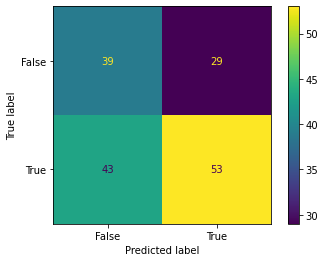

In [91]:
# actual = numpy.random.binomial(1,.9,size = 1000)
# predicted = numpy.random.binomial(1,.9,size = 1000)

# test_y[np.where(test_y == 1)] = True
# test_y[np.where(test_y == 0)] = False

# predictions = np.where(predictions == 1, 1., 0.)

# print(test_y)
# print(predictions)
confusion_matrix = metrics.confusion_matrix(test_y[0], predictions[0])

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [95]:
Precision = metrics.precision_score(test_y[0], predictions[0])
Precision

0.6463414634146342

In [96]:
Specificity = metrics.recall_score(test_y[0], predictions[0], pos_label=0)
Specificity

0.5735294117647058

In [97]:
F1_score = metrics.f1_score(test_y[0], predictions[0])
F1_score

0.5955056179775281